## Introduction to Deep Learning 
# Part 4 - Keras minst example

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline  

## Lets start Keras
In the Mnist classification example, we saw that the net basicly learn templates.<br>
This is not robust enought for generalization. <br>
To generalize, we want the neural network to learn **feutures**. <br>
For that we will need deeper networks.<br>
Lets build our first neural network with Keras.

In [10]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequentialis the basic feed foeward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

#### Load and normalize data set

In [26]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [27]:
# convert class vectors to binary class matrices
# create "dummy" variablesfor each category
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Create the model
In previous chapter,I used the word network,in practical world, it called model.<br>
Model is from keras examples: https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py

In [28]:
# Create the model, and lay the layers oneontop of the other
# specifing layers parameters.
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [29]:
# Create the model, the network
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Train the model
While training the model, lets view the layers. For humen eye,I reshape the layers to 2D shapes.

In [30]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 11s 185us/step - loss: 0.2476 - acc: 0.9247 - val_loss: 0.1057 - val_acc: 0.9661
Epoch 2/2
60000/60000 [==============================] - 11s 180us/step - loss: 0.1022 - acc: 0.9683 - val_loss: 0.0837 - val_acc: 0.9752


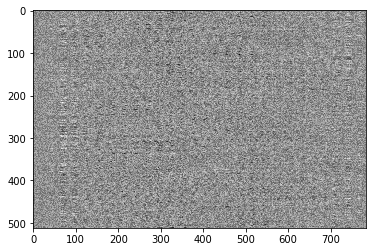

In [41]:
W = model.get_layer(name=model.layers[0].name).get_weights()[0]
Wa=W.reshape((784,512)).copy()
plt.figure()
plt.imshow(Wa.T);
plt.set_cmap('gray')

In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 11s 183us/step - loss: 0.0720 - acc: 0.9776 - val_loss: 0.0811 - val_acc: 0.9756
Epoch 2/2
60000/60000 [==============================] - 11s 183us/step - loss: 0.0602 - acc: 0.9825 - val_loss: 0.0846 - val_acc: 0.9775


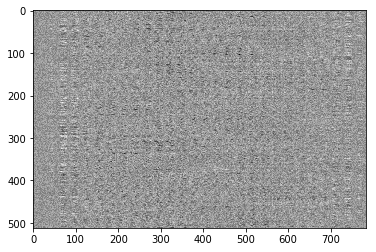

In [43]:
W = model.get_layer(name=model.layers[0].name).get_weights()[0]
Wa=W.reshape((784,512)).copy()
plt.figure()
plt.imshow(Wa.T);
plt.set_cmap('gray')

In [44]:
# Initialize model, and train for 10 epoch
model = get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.2453 - acc: 0.9248 - val_loss: 0.1158 - val_acc: 0.9634
Epoch 2/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1012 - acc: 0.9702 - val_loss: 0.0889 - val_acc: 0.9736
Epoch 3/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0749 - acc: 0.9775 - val_loss: 0.0893 - val_acc: 0.9749
Epoch 4/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0583 - acc: 0.9826 - val_loss: 0.0773 - val_acc: 0.9784
Epoch 5/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0511 - acc: 0.9850 - val_loss: 0.0789 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0424 - acc: 0.9872 - val_loss: 0.0797 - val_acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0377 - acc: 0.9883 - val_loss: 0.

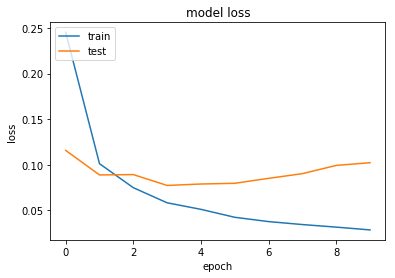

In [46]:
uplot.drow_history(history, 'loss')

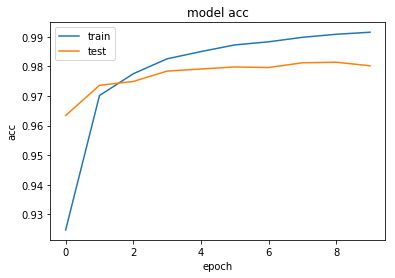

In [47]:
uplot.drow_history(history, 'acc')

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10226679883732777
Test accuracy: 0.9802


## Predict


[6 0 5 4 9 9 2 1 9 4]
[6 0 5 4 9 9 2 1 9 4]


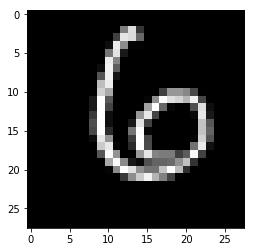

In [67]:
x = x_test[100:110]

preds = model.predict_classes(x);

print(preds)
print(np.argmax(y_test[100:110],axis=1))
plt.imshow(x_test[100].reshape(28,28))

### Learn more:
* This part was written as an attempt to understand Hinton's lecture: https://www.coursera.org/learn/neural-networks/lecture/bD3OB/learning-the-weights-of-a-linear-neuron-12-min
* Google machine learning course https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent